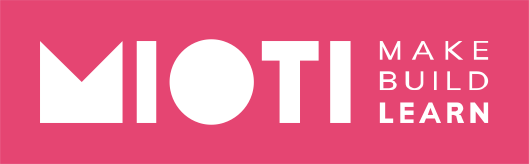
<center style="color:#888">Estadística para Data Science<br/>Asignatura Estadística</center>

# Ejercicio Ticket

Datos:
>> Nombre Equipo/Grupo: PYTHONEROS

>> Miembros: Efrain Gonzalez / Pablo Sagrera


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_xls = pd.read_excel('Ticket.xlsx', 'Hoja1', index_col=None)
data_xls.to_csv('ticket.csv', encoding='utf-8', index=False)

In [3]:
df = pd.read_csv('ticket.csv')

# 1.- Estudio de los datos

In [4]:
df.head()

,Prioridad*,F. Ultima Resolución,Fecha de envío,Fecha Cierre,Year OUTPUT,Month OUTPUT
0,Media,2017-01-31 22:50:35,2017-01-31 20:21:57,2017-02-08 02:00:00,2017,1
1,Alta,2017-01-31 23:05:49,2017-01-31 16:45:30,2017-02-08 02:00:00,2017,1
2,Baja,2017-01-31 18:12:13,2017-01-31 16:47:01,2017-02-08 02:00:00,2017,1
3,Baja,2017-01-31 17:56:18,2017-01-31 16:40:37,2017-02-08 02:00:00,2017,1
4,Media,2017-01-31 17:57:25,2017-01-31 16:42:41,2017-02-08 02:00:00,2017,1


In [5]:
# Filtramos los NAN
df_filtered = df.dropna()

# 2.- Ticket gestionados por año, por mes y por prioridad

In [6]:
# Numero de tickets por prioridad sin tener en cuenta el año
tickets_per_priority = df_filtered.groupby('Prioridad*').size()
tickets_per_priority

Prioridad*
Alta        26197
Baja       209014
Crítica      1593
Media       68908
dtype: int64

In [7]:
# Numero de tickets por prioridad teniendo en cuenta el año
tickets_per_priority_year = df_filtered.groupby(['Year OUTPUT','Prioridad*']).size()
tickets_per_priority_year

Year OUTPUT  Prioridad*
2017         Alta           6946
             Baja          60628
             Crítica         734
             Media         19471
2018         Alta           7761
             Baja          72348
             Crítica         539
             Media         21574
2019         Alta          10874
             Baja          72595
             Crítica         309
             Media         26254
2020         Alta            616
             Baja           3443
             Crítica          11
             Media          1609
dtype: int64

In [8]:
# Numero de tickets por prioridad teniendo en cuenta el año y el mes
df_filtered.groupby(['Year OUTPUT','Month OUTPUT','Prioridad*']).size()

Year OUTPUT  Month OUTPUT  Prioridad*
2017         1             Alta           346
                           Baja          5214
                           Crítica         20
                           Media         1199
             2             Alta           333
                                         ... 
2019         12            Media         2527
2020         1             Alta           616
                           Baja          3443
                           Crítica         11
                           Media         1609
Length: 148, dtype: int64

In [9]:
#Numero de tickets por año sin tener en cuenta el mes
ticket_per_year = df_filtered.groupby('Year OUTPUT').size()
ticket_per_year

Year OUTPUT
2017     87779
2018    102222
2019    110032
2020      5679
dtype: int64

In [10]:
#Numero de tickets por año teniendo en cuenta el mes
ticket_per_year_month = df_filtered.groupby(['Year OUTPUT','Month OUTPUT']).size()
ticket_per_year_month

Year OUTPUT  Month OUTPUT
2017         1                6779
             2                6971
             3                7872
             4                6177
             5                6998
             6                7584
             7                7220
             8                6327
             9                6957
             10               8306
             11               9374
             12               7214
2018         1                9397
             2                7727
             3                7927
             4                8051
             5                8524
             6                6674
             7                8321
             8                8381
             9                8661
             10               9981
             11               9730
             12               8848
2019         1               10128
             2                9024
             3                9569
             4               

In [11]:
# Numero de tickets por año por mes
tickets_per_month = df_filtered.groupby(['Month OUTPUT','Year OUTPUT']).size()
tickets_per_month

Month OUTPUT  Year OUTPUT
1             2017            6779
              2018            9397
              2019           10128
              2020            5679
2             2017            6971
              2018            7727
              2019            9024
3             2017            7872
              2018            7927
              2019            9569
4             2017            6177
              2018            8051
              2019           10135
5             2017            6998
              2018            8524
              2019           10676
6             2017            7584
              2018            6674
              2019            7011
7             2017            7220
              2018            8321
              2019           10198
8             2017            6327
              2018            8381
              2019            8533
9             2017            6957
              2018            8661
              2019           

# 3.- Media de ticket gestionados por mes

In [12]:
mean_tickets_per_month = tickets_per_month.mean()
mean_tickets_per_month

8262.486486486487

# 4.- Idem desglosados por prioridad (globales)

In [17]:
# Tickets gestionados por mes (considerando el año)
alta = df_filtered['Prioridad*'] == 'Alta'
media = df_filtered['Prioridad*'] == 'Media'
baja = df_filtered['Prioridad*'] == 'Baja'
critica = df_filtered['Prioridad*'] == 'Crítica'

In [16]:
# Tickets gestionados por mes con prioridad alta
tickets_de_prioridad_alta=df_filtered[alta].groupby(['Year OUTPUT','Month OUTPUT']).size()
tickets_de_prioridad_alta.mean()

708.027027027027

In [18]:
# Tickets gestionados por mes con prioridad media
tickets_de_prioridad_alta=df_filtered[media].groupby(['Year OUTPUT','Month OUTPUT']).size()
tickets_de_prioridad_alta.mean()

1862.3783783783783

In [19]:
# Tickets gestionados por mes con prioridad baja
tickets_de_prioridad_alta=df_filtered[baja].groupby(['Year OUTPUT','Month OUTPUT']).size()
tickets_de_prioridad_alta.mean()

5649.027027027027

In [20]:
# Tickets gestionados por mes con prioridad critica
tickets_de_prioridad_alta=df_filtered[critica].groupby(['Year OUTPUT','Month OUTPUT']).size()
tickets_de_prioridad_alta.mean()

43.054054054054056

# 5.- Teniendo en cuenta 3, rango intercuartílico y coeficiente de variación de Pearson

In [24]:
# Rango intercuartilico Q3 -Q1
Q3 = tickets_per_month.quantile(0.75)
Q1 = tickets_per_month.quantile(0.25)
IQR = Q3 - Q1
IQR

2160.0

In [25]:
#El coeficiente de variación de Pearson (r) mide la variación de los datos respecto a la media, sin tener en cuenta las unidades en la que están
#El coeficiente de variación toma valores entre 0 y 1. 
#Si el coeficiente es próximo al 0, significa que existe poca variabilidad en los datos y es una muestra muy compacta. 
#En cambio, si tienden a 1 es una muestra muy dispersa.
coeficiente_de_variacion=tickets_per_month.std(ddof=0) / tickets_per_month.mean()
coeficiente_de_variacion
# En este caso parece que existe poco variabilidad en los datos relacionados con los tickets por mes

0.15415927203511426